In [14]:
import os
import innvestigate

import tensorflow as tf
from data import read_crop_list, load_structured_sample
from eval import eval_model_one_hot

from metrics import f1, f1_loss
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import concatenate, Embedding, LSTM, BatchNormalization, Dense, \
    Conv1D, GlobalAveragePooling1D, Dropout, Input, Permute, Concatenate, GlobalMaxPooling1D, MaxPooling1D, \
    Flatten, Activation, Reshape,SpatialDropout1D, Add, MaxPooling1D

from matplotlib import pyplot as plt

In [2]:

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

tf.keras.utils.get_custom_objects()
tf.keras.utils.get_custom_objects()['f1'] = f1
tf.keras.utils.get_custom_objects()['f1_loss'] = f1_loss
model_folder = '/home/gus/workspaces/wpy/IACapstone/results/conv1d/20200809_165303_conv_rest_stacked/model'
model = tf.keras.models.load_model(model_folder)

In [3]:

df_crops, vocab = read_crop_list()

sample = load_structured_sample()
# sample = load_undersampled_data()
print("Using sample size: {}".format(sample.shape))

y = sample[:, 11]
X = sample[:, 3:11]
sequence_length = X.shape[-1]

# X = one_hot_encoding_X(X, vocab_size=vocab_size)
# y = to_categorical(y)

Using sample size: (31373, 12)


In [4]:
layer_outputs = []

for layer in model.layers:
    if "conv1d" in layer.name:
        layer_outputs.append(layer.output)
#         print(layer.weights[0].shape)
        
        
       

In [5]:
# Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input


# row1 = X[0,:]
# print(row1.shape)


# activations = activation_model.predict(row1.reshape[1,-1]) 

In [36]:
row1 = X[1,:].reshape((1,-1))
print(row1.shape)

activations = activation_model.predict(row1) 

print(len(layer_outputs))
print(len(activations))

(1, 8)
8
8


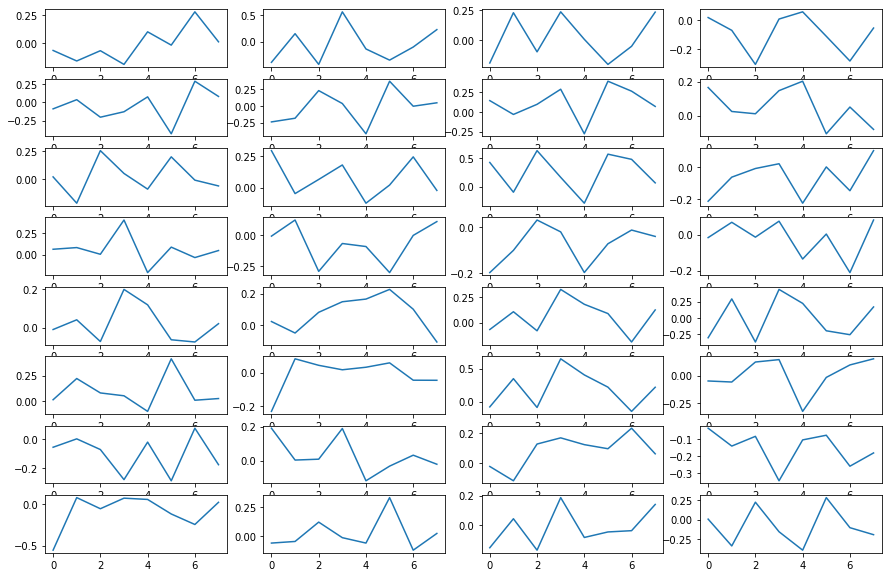

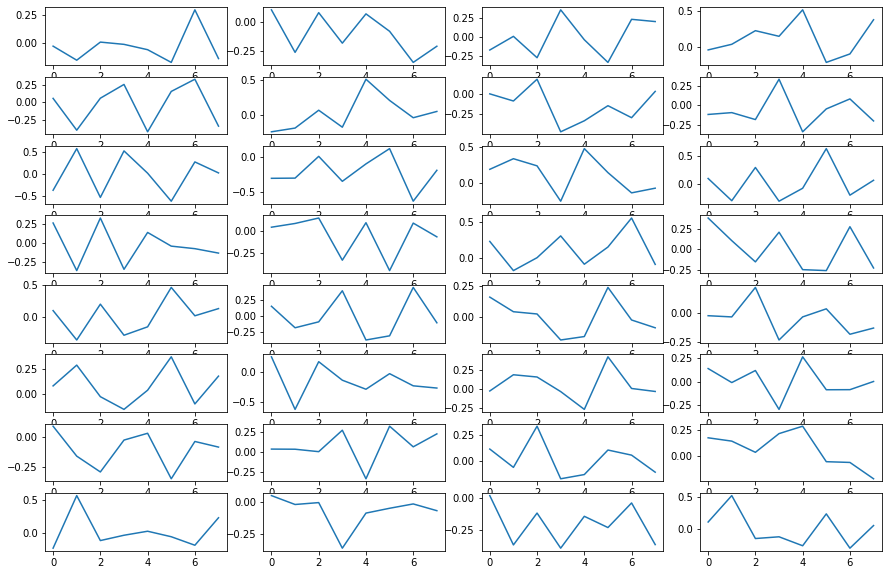

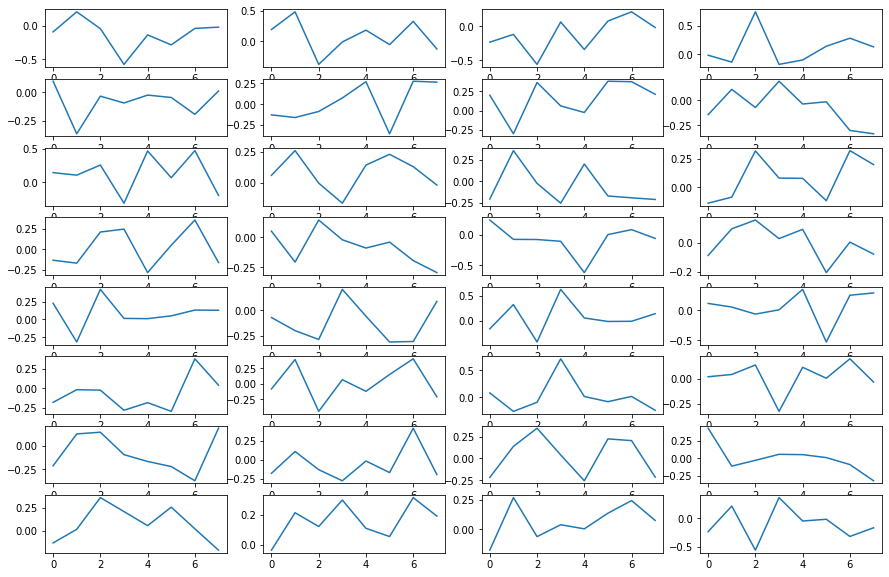

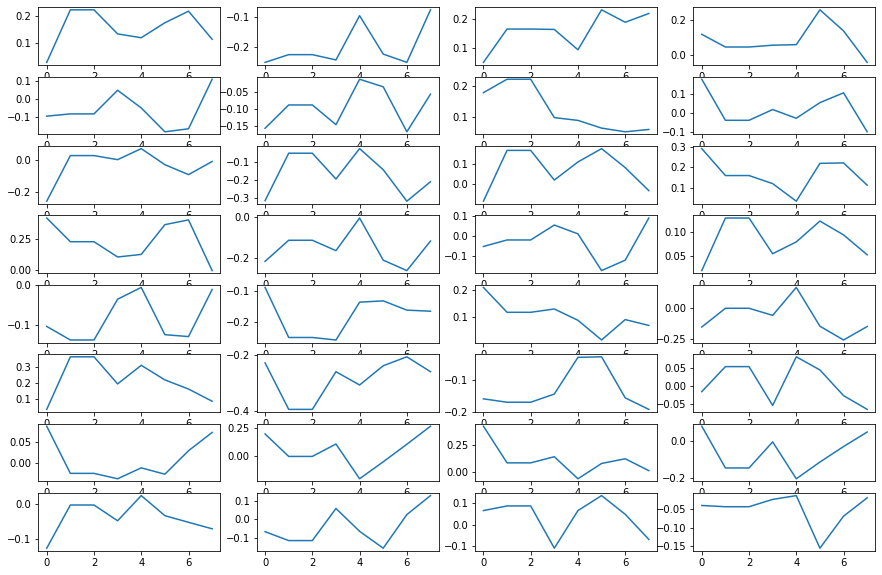

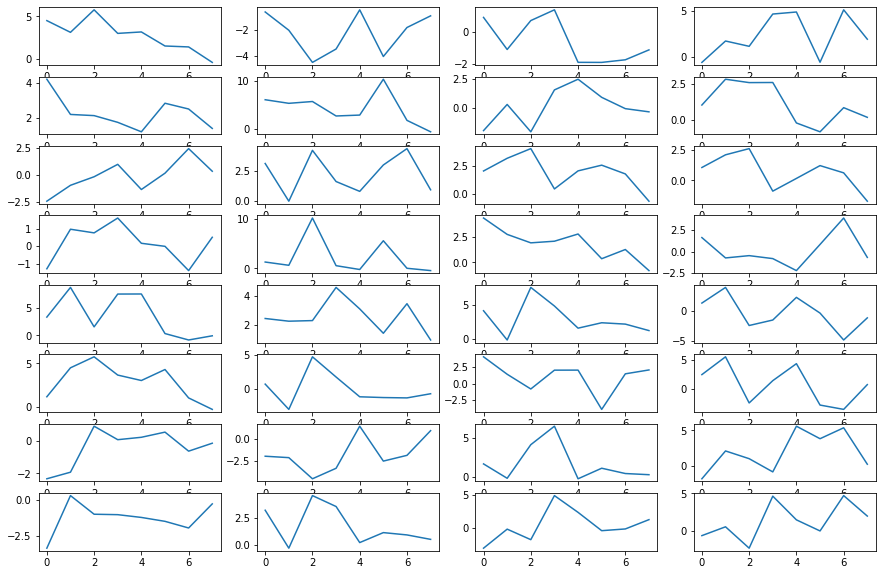

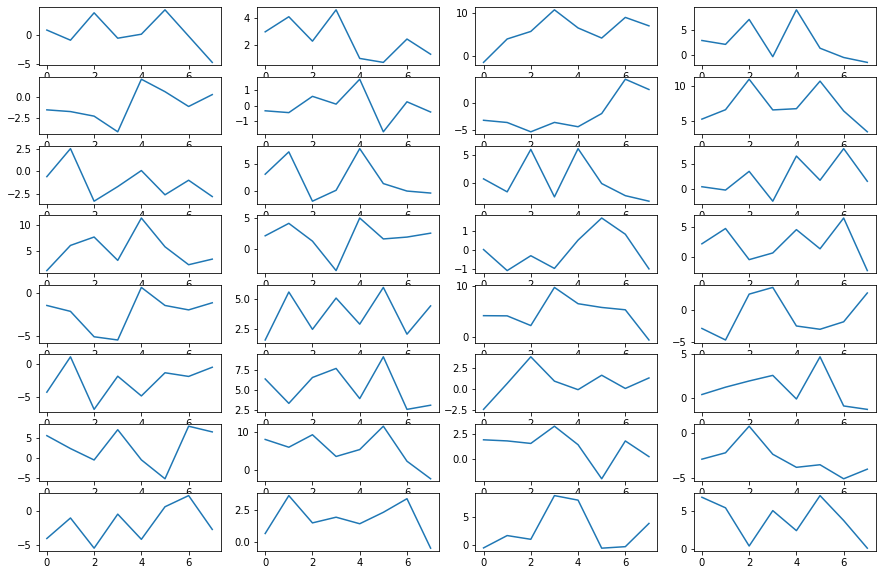

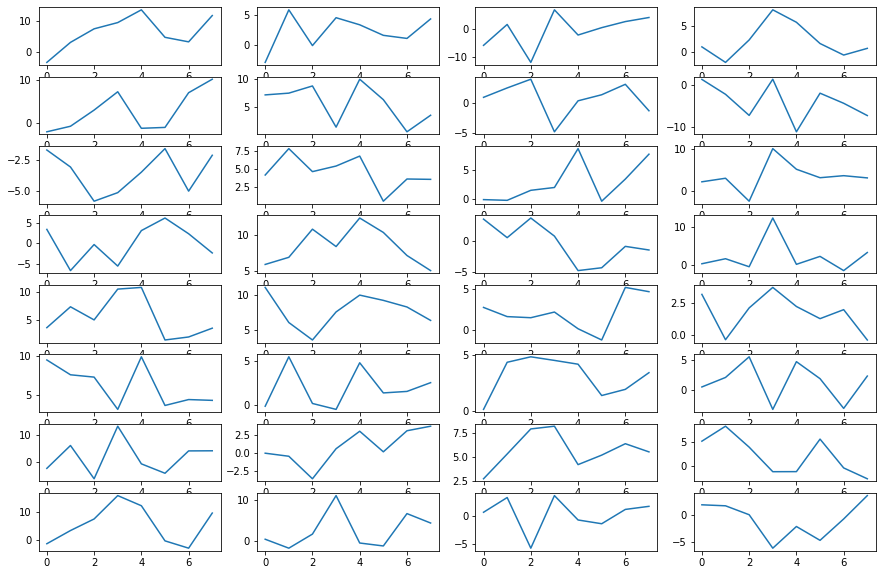

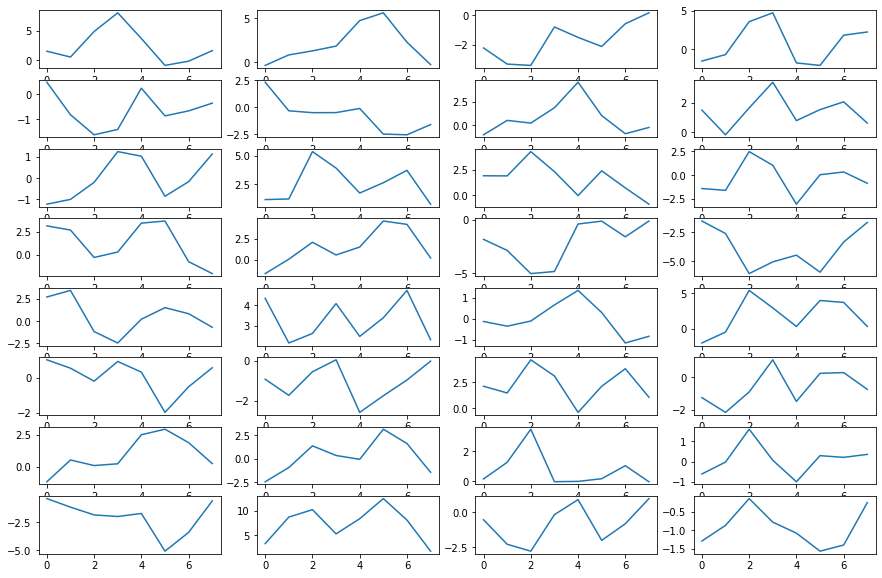

In [40]:
# plt.plot(activations[0][0,:,0])

for l,layer in enumerate(activations):
    fig, axes = plt.subplots(ncols=4, nrows=8, figsize=(15, 10))
    # fig.figsize((20,20))

    for i, ax in enumerate(axes.flat):
        ax.plot(activations[l][0,:,i])
    